# How Does a Bike-Share Navigate Speedy Success?

## Case Study Overview

* This case study is my **capstone project** for the *Google Data Analytics Professional Certificate*.
* I am a **junior data analyst** on the **marketing analytics team** at **Cyclistic**, a fictional bike-share company based in Chicago.
* In 2016, Cyclistic operates **over 5,800 bicycles** and **600+ docking stations** across the city. This bike-share program offers three pricing options: **Single-ride passes**, **Full-day passes**, and **Annual memberships**.
* Customers with **single-ride** or **full-day passes** are referred to as **Casual Riders**.
* Customers with **annual memberships** are referred to as **Annual Members**.

## Business Objective

### Context

* **Lily Moreno**, Director of Marketing and my manager, believes that growing the number of **annual members** is essential for Cyclistic’s future success.
* Instead of targeting entirely new customers, she sees potential in converting **existing casual riders** into **annual members**.
* Casual riders are already using Cyclistic and are familiar with the service — making them ideal candidates for membership.

### Team’s Primary Goal

Create effective marketing strategies to convert casual riders into annual members.

### Focus Area

To achieve the primary goal, our team must address the following key questions:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders consider purchasing annual memberships?
3. How can Cyclistic use digital media to influence casual riders?

I was asked to focus on **first question**:
    
> **Analyze Cyclistic's historical bike trip data to uncover trends and key differences in usage between annual members and casual riders. These insights will guide recommendations for targeted marketing initiatives aimed at increasing annual memberships.**

## Data Sources

* As Cyclistic is a fictional company, I am using **Divvy bicycle sharing service** [trip data](https://divvy-tripdata.s3.amazonaws.com/index.html) as **proxy data** for this analysis.
* **Lyft Bikes and Scooters**, which manages *Chicago's Divvy bike-sharing program*, made specific Divvy system data available to the **public** under this [license agreement](https://divvybikes.com/data-license-agreement).
* These public datasets are **credible** as they are *reliable*, *original*, *comprehensive*, *current*, and *cited*.
* The riders' privacy will be protected throughout this analysis, by actively preventing usage of any personally identifiable information.
* The Divvy's [2019 Q1](https://docs.google.com/spreadsheets/d/1uCTsHlZLm4L7-ueaSLwDg0ut3BP_V4mKDo2IMpaXrk4/template/preview?resourcekey=0-dQAUjAu2UUCsLEQQt20PDA#gid=1797029090) & [2020 Q1](https://docs.google.com/spreadsheets/d/179QVLO_yu5BJEKFVZShsKag74ZaUYIF6FevLYzs3hRc/template/preview#gid=640449855) datasets are downloaded and uploaded into this **Kaggle notebook** for analysis and an extra layer of security.
* **Kaggle's R kernel** will be used to clean, analyze, and visualize the data.

Load required R packages: `tidyverse` and `conflicted`.

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(conflicted) # to manage conflicts between packages

# set dplyr::filter and dplyr::lag as the default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[conflicted] Will prefer dplyr::filter over any other package.


[conflicted] Will prefer dplyr::lag over any other package.


Load the datasets as dataframes into this notebook.

In [2]:
# Input data files are available in the read-only "../input/" directory

q1_2019 <- read_csv(
  "../input/divvy-tripdata/Divvy_Trips_2019_Q1/Divvy_Trips_2019_Q1.csv",
  show_col_types = FALSE
)
q1_2020 <- read_csv(
  "../input/divvy-tripdata/Divvy_Trips_2020_Q1/Divvy_Trips_2020_Q1.csv",
  show_col_types = FALSE
)

Create `display_dimensions` function to understand the dimensions of a dataset.

In [3]:
display_dimensions <- function(df, df_name) {
    dimensions <- dim(df)
    cat("The", df_name, "dataframe has", dimensions[1], 
        "rows in", dimensions[2], "columns:", 
        paste(colnames(df), collapse = ", "), "\n")
}

Understand the dimensions of both datasets.

In [4]:
display_dimensions(q1_2019, "2019 Q1")
cat("\n")
display_dimensions(q1_2020, "2020 Q1")

The 2019 Q1 dataframe has 365069 rows in 12 columns: trip_id, start_time, end_time, bikeid, tripduration, from_station_id, from_station_name, to_station_id, to_station_name, usertype, gender, birthyear 


The 2020 Q1 dataframe has 426887 rows in 13 columns: ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual 


**These are the differences identified in column names between the two datasets:**

* `ride_id` in 2020 Q1 dataset is named `trip_id` in 2019 Q1 dataset.
* `started_at` and `ended_at` in 2020 Q1 dataset are named `start_time` and `end_time` in 2019 Q1 dataset.
* `start_station_name` and `start_station_id` in 2020 Q1 dataset are named `from_station_name` and `from_station_id` in 2019 Q1 dataset.
* `end_station_name` and `end_station_id` in 2020 Q1 dataset are named `to_station_name` and `to_station_id` in 2019 Q1 dataset.
* `member_casual` in 2020 Q1 dataset is named `usertype` in 2019 Q1 dataset.
* `bikeid`, `tripduration`, `gender`, and `birthyear` columns in the 2019 Q1 dataset are not present in the 2020 Q1 dataset.
* `rideable_type`, `start_lat`, `start_lng`, `end_lat`, and `end_lng` columns in the 2020 Q1 dataset are not present in the 2019 Q1 dataset.

Remove the fields that are not common in both datasets to streamline the data and focus on the columns that are essential for understanding bike usage patterns.

In [5]:
q1_2019 <- q1_2019 %>%
  select(
    -c(bikeid, tripduration, gender, birthyear)
  )

q1_2020 <- q1_2020 %>%
  select(
    -c(rideable_type, start_lat, start_lng, end_lat, end_lng)
  )

Standardize the column names of 2019 Q1 dataset to match the latest 2020 Q1 dataset. This will ensure consistency in column names across both datasets, making it easier to combine and analyze them later.

In [6]:
q1_2019 <- q1_2019 %>%
  rename(
    ride_id = trip_id,
    started_at = start_time,
    ended_at = end_time,
    start_station_name = from_station_name,
    start_station_id = from_station_id,
    end_station_name = to_station_name,
    end_station_id = to_station_id,
    member_casual = usertype
  )

Confirm that the column names of the 2019 Q1 dataset match the 2020 Q1 dataset.

In [7]:
display_dimensions(q1_2019, "2019 Q1")
cat("\n")
display_dimensions(q1_2020, "2020 Q1")

The 2019 Q1 dataframe has 365069 rows in 8 columns: ride_id, started_at, ended_at, start_station_id, start_station_name, end_station_id, end_station_name, member_casual 


The 2020 Q1 dataframe has 426887 rows in 8 columns: ride_id, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual 


Create `display_column_types` function to inspect the types of the columns in a dataset.

In [8]:
display_column_types <- function(df, df_name) {
    cat("Types of columns in", df_name, "dataframe:\n")
    sapply(df, class)
}

Inspect the types of the columns in both datasets to identify any discrepancies that may affect the analysis.

In [9]:
display_column_types(q1_2019, "2019 Q1")
cat("\n")
display_column_types(q1_2020, "2020 Q1")

Types of columns in 2019 Q1 dataframe:


$ride_id
[1] "numeric"

$started_at
[1] "POSIXct" "POSIXt" 

$ended_at
[1] "POSIXct" "POSIXt" 

$start_station_id
[1] "numeric"

$start_station_name
[1] "character"

$end_station_id
[1] "numeric"

$end_station_name
[1] "character"

$member_casual
[1] "character"

Types of columns in 2020 Q1 dataframe:


$ride_id
[1] "character"

$started_at
[1] "POSIXct" "POSIXt" 

$ended_at
[1] "POSIXct" "POSIXt" 

$start_station_name
[1] "character"

$start_station_id
[1] "numeric"

$end_station_name
[1] "character"

$end_station_id
[1] "numeric"

$member_casual
[1] "character"

The `ride_id` column in the 2019 Q1 dataset is of type `integer`, while in the 2020 Q1 dataset it is of type `character`. To ensure consistency, I will convert this column in the 2019 Q1 dataset to `character` type.

In [10]:
q1_2019 <- q1_2019 %>%
  mutate(
    ride_id = as.character(ride_id)
  )

Inspect the structure of both datasets. This will help verify that the data types and column names are consistent across both datasets.

In [11]:
cat("The structure of 2019 Q1 dataframe:\n")
str(q1_2019)
cat("\n")
cat("The structure of 2020 Q1 dataframe:\n")
str(q1_2020)

The structure of 2019 Q1 dataframe:


tibble [365,069 × 8] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:365069] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:365069], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:365069], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:365069] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


The structure of 2020 Q1 dataframe:


tibble [426,887 × 8] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ member_casual     : chr [1:426887] "member" "member" "member" "member" ...


There are some entries in `end_station_name` column of 2019 Q1 dataset with "(*)". We will check if these are valid data by matching the unique number of Station IDs and Station names in each dataset.

In [12]:
# Create a function to display station counts.
display_station_counts <- function(df, df_name) {
    start_station_id_count = length(unique(df$start_station_id))
    start_station_name_count = length(unique(df$start_station_name))
    end_station_id_count = length(unique(df$end_station_id))
    end_station_name_count = length(unique(df$end_station_name))
    cat("The ", df_name, " dataframe has trips started from", 
        start_station_id_count, "Station IDs and", 
        start_station_name_count, "Station Names.\n")
    cat("The ", df_name, " dataframe has trips ended at", 
        end_station_id_count, "Station IDs and", 
        end_station_name_count, "Station Names.\n")
}

display_station_counts(q1_2019, "2019 Q1")
cat("\n")
display_station_counts(q1_2020, "2020 Q1")

The  2019 Q1  dataframe has trips started from 594 Station IDs and 594 Station Names.
The  2019 Q1  dataframe has trips ended at 600 Station IDs and 600 Station Names.


The  2020 Q1  dataframe has trips started from 607 Station IDs and 607 Station Names.
The  2020 Q1  dataframe has trips ended at 603 Station IDs and 603 Station Names.


The station counts matched.

There is also a difference observed in the labels for rider types in the `member_casual` column between the two datasets. We will see what the labels are in each dataset.

In [13]:
cat("The rider types in 2019 Q1 dataframe:", 
    paste(unique(q1_2019$member_casual), collapse = ", "), "\n")
cat("The rider types in 2020 Q1 dataframe:", 
    paste(unique(q1_2020$member_casual), collapse = ", "))

The rider types in 2019 Q1 dataframe: Subscriber, Customer 


The rider types in 2020 Q1 dataframe: member, casual

As the analysis focuses on the differences in bike usage patterns between annual members and casual riders, I will replace "Subscriber" with "member" and "Customer" with "casual" in the `member_casual` column in 2019 Q1 dataset. This will help standardize the rider types and make it easier to analyze the data.

In [14]:
q1_2019 <- q1_2019 %>% 
    mutate(
        member_casual = recode(
            member_casual,
            "Subscriber" = "member",
            "Customer" = "casual"
        )
    )

See the statistical summary of each dataset to understand the individual data better.

In [15]:
cat("The statistical summary of 2019 Q1 dataframe:")
summary(q1_2019)
cat("---\n")
cat("The statistical summary of 2020 Q1 dataframe:")
summary(q1_2020)

The statistical summary of 2019 Q1 dataframe:

   ride_id            started_at                    
 Length:365069      Min.   :2019-01-01 00:04:37.00  
 Class :character   1st Qu.:2019-01-23 05:26:54.00  
 Mode  :character   Median :2019-02-25 07:52:56.00  
                    Mean   :2019-02-19 21:43:15.42  
                    3rd Qu.:2019-03-17 16:52:47.00  
                    Max.   :2019-03-31 23:53:48.00  
    ended_at                      start_station_id start_station_name
 Min.   :2019-01-01 00:11:07.00   Min.   :  2.0    Length:365069     
 1st Qu.:2019-01-23 05:49:40.00   1st Qu.: 76.0    Class :character  
 Median :2019-02-25 08:03:50.00   Median :170.0    Mode  :character  
 Mean   :2019-02-19 22:00:11.91   Mean   :198.1                      
 3rd Qu.:2019-03-17 17:16:16.00   3rd Qu.:287.0                      
 Max.   :2019-06-17 16:04:35.00   Max.   :665.0                      
 end_station_id  end_station_name   member_casual     
 Min.   :  2.0   Length:365069      Length:365069     
 1st Qu.: 76.0   Class :chara

---


The statistical summary of 2020 Q1 dataframe:

   ride_id            started_at                    
 Length:426887      Min.   :2020-01-01 00:04:44.00  
 Class :character   1st Qu.:2020-01-24 14:03:26.00  
 Mode  :character   Median :2020-02-17 05:01:27.00  
                    Mean   :2020-02-14 01:23:18.51  
                    3rd Qu.:2020-03-05 15:08:13.50  
                    Max.   :2020-03-31 23:51:34.00  
                                                    
    ended_at                      start_station_name start_station_id
 Min.   :2020-01-01 00:10:54.00   Length:426887      Min.   :  2.0   
 1st Qu.:2020-01-24 14:21:24.50   Class :character   1st Qu.: 77.0   
 Median :2020-02-17 05:48:58.00   Mode  :character   Median :176.0   
 Mean   :2020-02-14 01:45:25.43                      Mean   :209.8   
 3rd Qu.:2020-03-05 15:27:54.00                      3rd Qu.:298.0   
 Max.   :2020-05-19 20:10:34.00                      Max.   :675.0   
                                                                     
 end_station_nam

The `started_at` values of 2019 Q1 dataset are in between January 2019 and March 2019 only, and the `started_at` values of 2020 Q1 dataset are in between January 2020 and March 2020 only.

There is one missing value in `end_station_id` of 2020 Q1 dataset. Remove this data entry.

In [16]:
initial_count <- nrow(q1_2020)
q1_2020 <- q1_2020 %>%
    filter(!is.na(end_station_id))
cat(initial_count - nrow(q1_2020), 
    "row with missing end_station_id is removed")

1 row with missing end_station_id is removed

As datasets are ready, combine the two datasets into a single dataset for further analysis.

In [17]:
all_trips <- bind_rows(q1_2019, q1_2020)

Remove duplicate entries if any exist.

In [18]:
initial_count <- nrow(all_trips)
all_trips <- distinct(all_trips)
cat(initial_count - nrow(all_trips), 
    "entries with duplicate data are removed.")

0 entries with duplicate data are removed.

How many rows and columns are in the dataset?

In [19]:
display_dimensions(all_trips, "All Trips")

The All Trips dataframe has 791955 rows in 8 columns: ride_id, started_at, ended_at, start_station_id, start_station_name, end_station_id, end_station_name, member_casual 


What are the coulmn types in the dataset?

In [20]:
display_column_types(all_trips, "All Trips")

Types of columns in All Trips dataframe:


$ride_id
[1] "character"

$started_at
[1] "POSIXct" "POSIXt" 

$ended_at
[1] "POSIXct" "POSIXt" 

$start_station_id
[1] "numeric"

$start_station_name
[1] "character"

$end_station_id
[1] "numeric"

$end_station_name
[1] "character"

$member_casual
[1] "character"

See the first 6 rows of the dataset.

In [21]:
head(all_trips)

ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,member
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),member
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),member
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,member
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,member
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,member


Display the last six rows of the dataset.

In [22]:
tail(all_trips)

ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>
6F4D221BDDFD943F,2020-03-10 10:40:27,2020-03-10 10:40:29,675,HQ QR,675,HQ QR,casual
ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,675,HQ QR,675,HQ QR,casual
82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,161,Rush St & Superior St,240,Sheridan Rd & Irving Park Rd,member
AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,141,Clark St & Lincoln Ave,210,Ashland Ave & Division St,casual
3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,672,Franklin St & Illinois St,264,Stetson Ave & South Water St,member
064EC7698E4FF9B3,2020-03-08 13:03:57,2020-03-08 13:32:27,110,Dearborn St & Erie St,85,Michigan Ave & Oak St,casual


Inspect the structure of the dataset.

In [23]:
str(all_trips)

tibble [791,955 × 8] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791955] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791955], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:791955], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ start_station_id  : num [1:791955] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791955] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791955] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791955] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791955] "member" "member" "member" "member" ...


Get a summary of the dataset to understand the distribution of values in each column.

In [24]:
summary(all_trips)

   ride_id            started_at                    
 Length:791955      Min.   :2019-01-01 00:04:37.00  
 Class :character   1st Qu.:2019-02-28 17:03:58.50  
 Mode  :character   Median :2020-01-07 12:48:49.00  
                    Mean   :2019-09-01 11:57:46.86  
                    3rd Qu.:2020-02-19 19:31:49.50  
                    Max.   :2020-03-31 23:51:34.00  
    ended_at                      start_station_id start_station_name
 Min.   :2019-01-01 00:11:07.00   Min.   :  2.0    Length:791955     
 1st Qu.:2019-02-28 17:15:57.50   1st Qu.: 77.0    Class :character  
 Median :2020-01-07 13:02:39.00   Median :174.0    Mode  :character  
 Mean   :2019-09-01 12:17:30.69   Mean   :204.4                      
 3rd Qu.:2020-02-19 19:51:50.50   3rd Qu.:291.0                      
 Max.   :2020-05-19 20:10:34.00   Max.   :675.0                      
 end_station_id  end_station_name   member_casual     
 Min.   :  2.0   Length:791955      Length:791955     
 1st Qu.: 77.0   Class :chara

Create new columns to extract the `started_date`, `started_month`, `started_day`, `started_year`, and `started_day_of_week` from the `started_at` column. This will help in analyzing ride patterns over time.

In [25]:
all_trips$started_date <- as.Date(all_trips$started_at)
all_trips$started_month <- format(all_trips$started_date, "%m")
all_trips$started_day <- format(all_trips$started_date, "%d")
all_trips$started_year <- format(all_trips$started_date, "%Y")
all_trips$started_day_of_week <- wday(all_trips$started_date, label = TRUE)

Calculate the ride length by subtracting the `started_at` time from the `ended_at` time. This will give us the duration of each ride in seconds. Then transform the `ride_duration` column into numeric format for data calculations.

In [26]:
all_trips$ride_duration <- difftime(all_trips$ended_at, 
                                    all_trips$started_at)
all_trips$ride_duration <- as.numeric(as.character(all_trips$ride_duration))

Inspect the structure of the columns in the dataset to ensure that the new columns have been added correctly and that the data types are appropriate for analysis.

In [27]:
str(all_trips)

tibble [791,955 × 14] (S3: tbl_df/tbl/data.frame)
 $ ride_id            : chr [1:791955] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at         : POSIXct[1:791955], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at           : POSIXct[1:791955], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ start_station_id   : num [1:791955] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name : chr [1:791955] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id     : num [1:791955] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name   : chr [1:791955] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual      : chr [1:791955] "member" "member" "member" "member" ...
 $ started_date       : Date[1:791955], format: "2019-01-01" "2019-01-01" ...
 $ started_month      : chr [1:791955] "01" "

Transform the `started_month`, `started_day`, and `started_year` columns into numeric for better analysis.

In [28]:
all_trips$started_month <- as.numeric(as.character(all_trips$started_month))
all_trips$started_day <- as.numeric(as.character(all_trips$started_day))
all_trips$started_year <- as.numeric(as.character(all_trips$started_year))

Get the summary of the dataset to see the updated statistics after adding the new columns.

In [29]:
summary(all_trips)

   ride_id            started_at                    
 Length:791955      Min.   :2019-01-01 00:04:37.00  
 Class :character   1st Qu.:2019-02-28 17:03:58.50  
 Mode  :character   Median :2020-01-07 12:48:49.00  
                    Mean   :2019-09-01 11:57:46.86  
                    3rd Qu.:2020-02-19 19:31:49.50  
                    Max.   :2020-03-31 23:51:34.00  
                                                    
    ended_at                      start_station_id start_station_name
 Min.   :2019-01-01 00:11:07.00   Min.   :  2.0    Length:791955     
 1st Qu.:2019-02-28 17:15:57.50   1st Qu.: 77.0    Class :character  
 Median :2020-01-07 13:02:39.00   Median :174.0    Mode  :character  
 Mean   :2019-09-01 12:17:30.69   Mean   :204.4                      
 3rd Qu.:2020-02-19 19:51:50.50   3rd Qu.:291.0                      
 Max.   :2020-05-19 20:10:34.00   Max.   :675.0                      
                                                                     
 end_station_id 

The `ride_duration` column have negative values, which indicates that there are rides where the end time is earlier than the start time. This could be due to data entry errors or other issues. See the records with negative or zero `ride_duration`.

In [30]:
bad_data <- all_trips %>%
  filter(
      ride_duration <= 0
  )
str(bad_data)

tibble [209 × 14] (S3: tbl_df/tbl/data.frame)
 $ ride_id            : chr [1:209] "23EF1DCC9FCA40BA" "9461DFF13D8BA8AD" "86163D9676BBBE62" "836931C569802344" ...
 $ started_at         : POSIXct[1:209], format: "2020-02-28 11:34:40" "2020-02-28 10:09:43" ...
 $ ended_at           : POSIXct[1:209], format: "2020-02-28 11:34:40" "2020-02-28 10:09:42" ...
 $ start_station_id   : num [1:209] 675 675 675 675 675 675 675 675 675 675 ...
 $ start_station_name : chr [1:209] "HQ QR" "HQ QR" "HQ QR" "HQ QR" ...
 $ end_station_id     : num [1:209] 675 675 675 675 675 675 675 675 675 675 ...
 $ end_station_name   : chr [1:209] "HQ QR" "HQ QR" "HQ QR" "HQ QR" ...
 $ member_casual      : chr [1:209] "casual" "casual" "casual" "casual" ...
 $ started_date       : Date[1:209], format: "2020-02-28" "2020-02-28" ...
 $ started_month      : num [1:209] 2 2 2 2 2 2 2 2 2 2 ...
 $ started_day        : num [1:209] 28 28 26 27 28 28 26 26 26 26 ...
 $ started_year       : num [1:209] 2020 2020 2020 2020 2020 

I have observed that many of these bad data entries in the dataset has same `start_station_name` and `end_station_name` as "HQ QR", `start_station_id` and `end_station_id` as 675, `member_casual` as "casual". We will see how many such entries have negative or zero `ride_duration`.

In [31]:
bad_data <- all_trips %>%
  filter(
      ride_duration <= 0 &
      start_station_name == "HQ QR" & end_station_name == "HQ QR" &
      start_station_id == 675 & end_station_id == 675 &
      member_casual == "casual"
  )
str(bad_data)

tibble [209 × 14] (S3: tbl_df/tbl/data.frame)
 $ ride_id            : chr [1:209] "23EF1DCC9FCA40BA" "9461DFF13D8BA8AD" "86163D9676BBBE62" "836931C569802344" ...
 $ started_at         : POSIXct[1:209], format: "2020-02-28 11:34:40" "2020-02-28 10:09:43" ...
 $ ended_at           : POSIXct[1:209], format: "2020-02-28 11:34:40" "2020-02-28 10:09:42" ...
 $ start_station_id   : num [1:209] 675 675 675 675 675 675 675 675 675 675 ...
 $ start_station_name : chr [1:209] "HQ QR" "HQ QR" "HQ QR" "HQ QR" ...
 $ end_station_id     : num [1:209] 675 675 675 675 675 675 675 675 675 675 ...
 $ end_station_name   : chr [1:209] "HQ QR" "HQ QR" "HQ QR" "HQ QR" ...
 $ member_casual      : chr [1:209] "casual" "casual" "casual" "casual" ...
 $ started_date       : Date[1:209], format: "2020-02-28" "2020-02-28" ...
 $ started_month      : num [1:209] 2 2 2 2 2 2 2 2 2 2 ...
 $ started_day        : num [1:209] 28 28 26 27 28 28 26 26 26 26 ...
 $ started_year       : num [1:209] 2020 2020 2020 2020 2020 

All these entries are likely related to the quality check of bikes at the Cyclistic headquarters (HQ QR) and should be removed.

In [32]:
all_trips_cleaned <- all_trips[
  !(
      all_trips$ride_duration <= 0 &
      all_trips$start_station_name == "HQ QR" & 
      all_trips$end_station_name == "HQ QR" &
      all_trips$start_station_id == 675 & 
      all_trips$end_station_id == 675      
  ),
]
cat(nrow(all_trips) - nrow(all_trips_cleaned), 
    "rows with bad data are removed.")

209 rows with bad data are removed.

The `ride_duration` column has a maximum value of 10,632,022 seconds (2953.34 hours), which is quite high and may indicate outliers or very long rides. See the spread, central tendency, and outliers using a box plot.

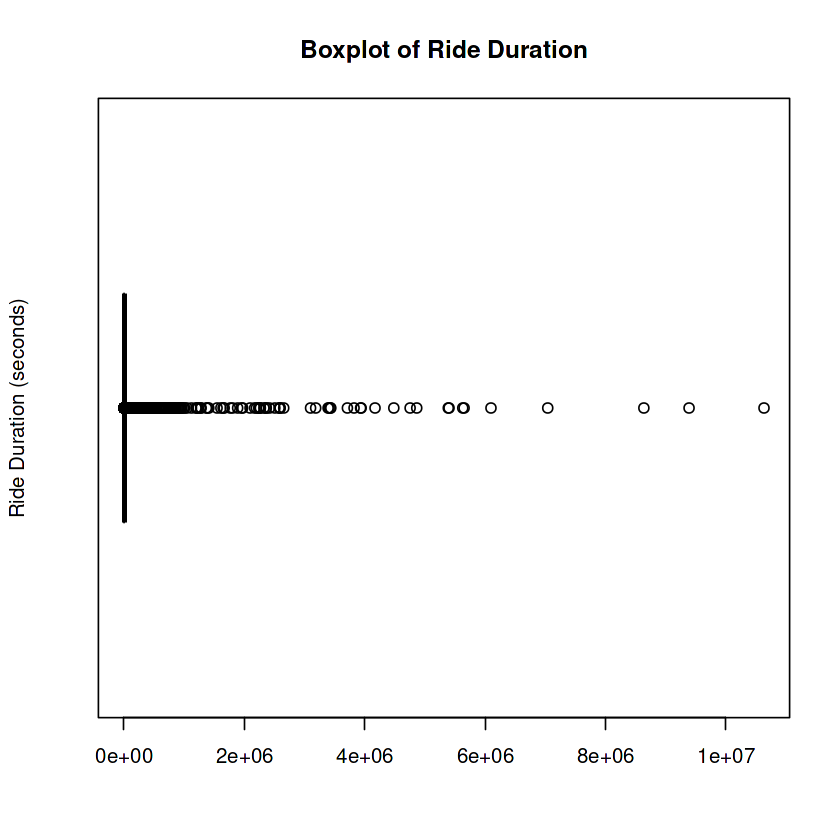

In [33]:
boxplot(all_trips_cleaned$ride_duration,
        main = "Boxplot of Ride Duration",
        ylab = "Ride Duration (seconds)",
        horizontal = TRUE,
        col = "skyblue"
       ) 

The data is `extremely right-skewed`. The circles on the right suggests `there are many outliers`. The entire box (25th to 75th percentile) is compressed around very small values - `typical rides are short`. We will investigate the outliers by creating quantiles.

In [34]:
summary(all_trips_cleaned$ride_duration)
quantile(all_trips_cleaned$ride_duration, probs = seq(0, 1, 0.01))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      328      537     1184      910 10632022 

0%         1%         2%         3%         4%         5%         6% 
       1.0       69.0      119.0      139.0      154.0      167.0      178.0 
        7%         8%         9%        10%        11%        12%        13% 
     188.0      197.0      207.0      215.0      224.0      232.0      240.0 
       14%        15%        16%        17%        18%        19%        20% 
     247.0      255.0      263.0      270.0      277.0      284.0      292.0 
       21%        22%        23%        24%        25%        26%        27% 
     299.0      306.0      313.0      320.0      328.0      335.0      343.0 
       28%        29%        30%        31%        32%        33%        34% 
     350.0      358.0      365.0      373.0      381.0      388.0      396.0 
       35%        36%        37%        38%        39%        40%        41% 
     404.0      412.0      420.0      428.0      437.0      445.0      454.0 
       42%        43%        44%        45%        46%        47%        48% 
     462.0      471.0      480.0      489.0      499.0      508.0      518.0 
       49%        50%        51%        52%        53%        54%        55% 
     528.0      537.0      547.0      558.0      568.0      579.0      590.0 
       56%        57%        58%        59%        60%        61%        62% 
     602.0      613.0      625.0      637.0      650.0      663.0      677.0 
       63%        64%        65%        66%        67%        68%        69% 
     691.0      706.0      720.0      736.0      753.0      769.0      787.0 
       70%        71%        72%        73%        74%        75%        76% 
     804.0      823.0      844.0      865.0      887.0      910.0      934.0 
       77%        78%        79%        80%        81%        82%        83% 
     960.0      988.0     1017.0     1048.0     1081.0     1117.0     1155.0 
       84%        85%        86%        87%        88%        89%        90% 
    1196.0     1240.0     1288.0     1338.0     1392.0     1452.0     1517.5 
       91%        92%        93%        94%        95%        96%        97% 
    1592.0     1677.0     1771.0     1885.0     2024.0     2201.0     2465.0 
       98%        99%       100% 
    3023.0     4629.0 10632022.0

The quantiles show that the extreme outliers exist on `100th percentile`. Filter extreme rides for clearer visuals.

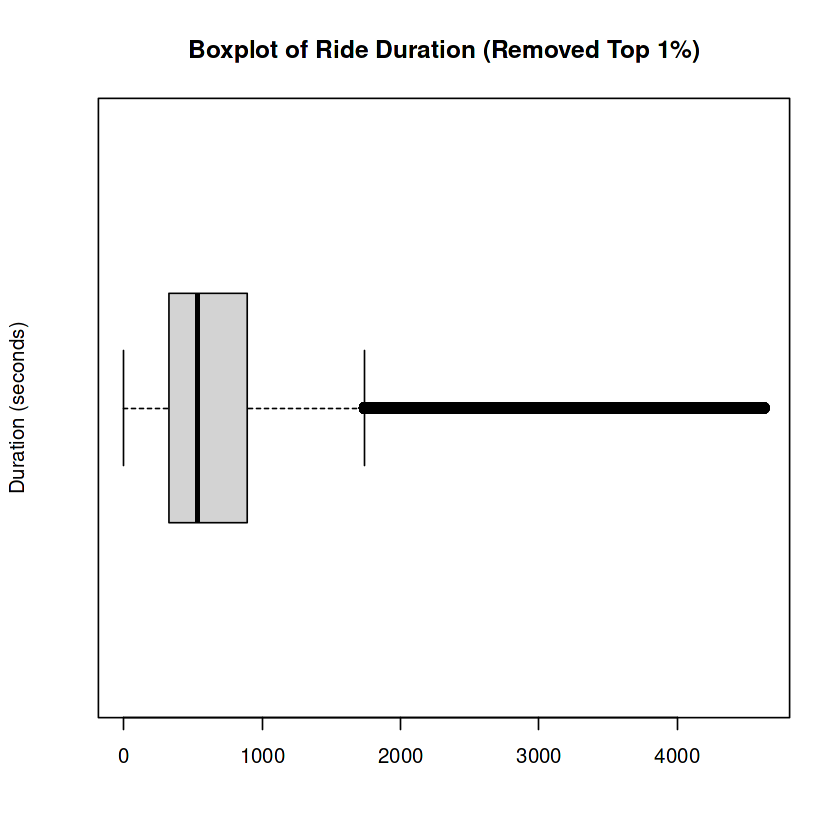

In [35]:
threshold <- quantile(all_trips_cleaned$ride_duration, 0.99)
boxplot(
    all_trips_cleaned$ride_duration[
        all_trips_cleaned$ride_duration <= threshold
    ], 
    main = "Boxplot of Ride Duration (Removed Top 1%)",
    ylab = "Duration (seconds)",
    horizontal = TRUE)

Although the boxplot without top 1% is still right-skewed, the spread is more understandable. So, remove the entries with top 1% `ride-duration` and continue with analysis.

**Note:** We could use the log-transformed data for modeling or advanced analysis. But for this case study, we can continue with our exploratory data analysis.

In [36]:
all_trips_cleaned <- all_trips_cleaned %>%
  filter(ride_duration < quantile(ride_duration, 0.99))

Inspect the structure of the cleaned dataset.

In [37]:
str(all_trips_cleaned)

tibble [783,827 × 14] (S3: tbl_df/tbl/data.frame)
 $ ride_id            : chr [1:783827] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at         : POSIXct[1:783827], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at           : POSIXct[1:783827], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ start_station_id   : num [1:783827] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name : chr [1:783827] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id     : num [1:783827] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name   : chr [1:783827] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual      : chr [1:783827] "member" "member" "member" "member" ...
 $ started_date       : Date[1:783827], format: "2019-01-01" "2019-01-01" ...
 $ started_month      : num [1:783827] 1 1 1 

Get the statistical summary of the cleaned dataset to understand the data (mainly numeric) distribution.

In [38]:
summary(all_trips_cleaned)

   ride_id            started_at                   
 Length:783827      Min.   :2019-01-01 00:04:37.0  
 Class :character   1st Qu.:2019-02-28 14:36:29.0  
 Mode  :character   Median :2020-01-07 08:57:02.0  
                    Mean   :2019-08-31 23:32:24.7  
                    3rd Qu.:2020-02-19 16:23:39.5  
                    Max.   :2020-03-31 23:51:34.0  
                                                   
    ended_at                      start_station_id start_station_name
 Min.   :2019-01-01 00:11:07.00   Min.   :  2.0    Length:783827     
 1st Qu.:2019-02-28 14:45:19.50   1st Qu.: 77.0    Class :character  
 Median :2020-01-07 09:08:38.00   Median :174.0    Mode  :character  
 Mean   :2019-08-31 23:44:17.76   Mean   :204.2                      
 3rd Qu.:2020-02-19 16:33:56.00   3rd Qu.:291.0                      
 Max.   :2020-04-01 00:03:33.00   Max.   :675.0                      
                                                                     
 end_station_id  end_sta

**Note:** The mean of `started_at` and `ended_at` columns are showing as August 29, 2019, which is out of our time frame. But from the summary of individual datasets before, these data falls inside the respected time frame only and this is caused due to the average date calculation by `summary()`. 

## Documentation of any cleaning or manipulation of data

* The R's `tidyverse` and `conflicted` packages are used to help analyzing this data and to manage any conflicts between the packages respectively.
* Loaded the datasets as dataframes into Kaggle's notebook.
* Started with understanding the dimensions of the two datasets.
  * The 2019 Q1 dataframe has 365069 rows in 12 columns: trip_id, start_time, end_time, bikeid, tripduration, from_station_id, from_station_name, to_station_id, to_station_name, usertype, gender, birthyear.
  * The 2020 Q1 dataframe has 426887 rows in 13 columns: ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual.
* These are the differences identified in column names between the two datasets:
  * `ride_id` in 2020 Q1 dataset is named `trip_id` in 2019 Q1 dataset.
  * `started_at` and `ended_at` in 2020 Q1 dataset are named `start_time` and `end_time` in 2019 Q1 dataset.
  * `start_station_name` and `start_station_id` in 2020 Q1 dataset are named `from_station_name` and `from_station_id` in 2019 Q1 dataset.
  * `end_station_name` and `end_station_id` in 2020 Q1 dataset are named `to_station_name` and `to_station_id` in 2019 Q1 dataset.
  * `member_casual` in 2020 Q1 dataset is named `usertype` in 2019 Q1 dataset.
  * `bikeid`, `tripduration`, `gender`, and `birthyear` columns in the 2019 Q1 dataset are not present in the 2020 Q1 dataset.
  * `rideable_type`, `start_lat`, `start_lng`, `end_lat`, and `end_lng` columns in the 2020 Q1 dataset are not present in the 2019 Q1 dataset.
* Removed the fields that are not common in the two datasets to streamline the data and focus on the columns that are essential for understanding bike usage patterns.
* Standardized the column names of 2019 Q1 dataset to match the latest 2020 Q1 dataset. This will ensure consistency in column names across the two datasets, making it easier to combine and analyze them later.
* Confirmed that the column names of the 2019 Q1 dataset match the 2020 Q1 dataset.
  * The 2019 Q1 dataframe has 365069 rows in 8 columns: ride_id, started_at, ended_at, start_station_id, start_station_name, end_station_id, end_station_name, member_casual. 
  * The 2020 Q1 dataframe has 426887 rows in 8 columns: ride_id, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual.
* Inspected the column types in the two datasets to identify any discrepancies that may affect the analysis.
* The `ride_id` column in the 2019 Q1 dataset is of type `integer`, while in the 2020 Q1 dataset it is of type `character`. To ensure consistency, converted this column in the 2019 Q1 dataset to `character` type.
* Inspected the structure of the two datasets to verify that the data types and column names are consistent across both datasets.
* Identified some entries in `end_station_name` column of 2019 Q1 dataset with "(*)". Validated that they are not any mistyped data by matching the unique number of station IDs and station names in each dataset.
  * The  2019 Q1  dataframe has trips started from 594 Station IDs and 594 Station Names. 
  * The  2019 Q1  dataframe has trips ended at 600 Station IDs and 600 Station Names.
  * The  2020 Q1  dataframe has trips started from 607 Station IDs and 607 Station Names.
  * The  2020 Q1  dataframe has trips ended at 603 Station IDs and 603 Station Names.
* There is also a difference observed in the labels for rider types in the `member_casual` column between the two datasets. 
  * The rider types in 2019 Q1 dataframe: Subscriber, Customer. 
  * The rider types in 2020 Q1 dataframe: member, casual
* As the analysis focuses on the differences in bike usage patterns between annual members and casual riders, replaced "Subscriber" with "member" and "Customer" with "casual" in the `member_casual` column in 2019 Q1 dataset. This will help standardize the rider types and make it easier to analyze the data.
* Calculated the statistical summary of each dataset to understand the individual data better.
* The `started_at` values of 2019 Q1 dataset are in between January 2019 and March 2019 only, and the `started_at` values of 2020 Q1 dataset are in between January 2020 and March 2020 only.
* There is one missing value in `end_station_id` of 2020 Q1 dataset. Removed this data entry.
* As datasets are ready, combined the two datasets into a single dataset for further analysis.
* As we merged two datasets, verified the new dataset for any duplicate entries and found none.
* Confirmed that no data is missed while merging: 
  * The All Trips dataframe has 791955 rows in 8 columns: ride_id, started_at, ended_at, start_station_id, start_station_name, end_station_id, end_station_name, member_casual. 
* Viewed the first and last six rows of data. Inspected the structure of the dataset.
* Calculated the statistical summary of the merged dataset to understand the distribution of values in each column.
* Created new columns to extract the `started_date`, `started_month`, `started_day`, `started_year`, and `started_day_of_week` from the `started_at` column. This will help in analyzing ride patterns over time.
* Calculated the ride length by subtracting the `started_at` time from the `ended_at` time. This will give us the duration of each ride in seconds. Then transformed this `ride_duration` column into numeric format for data calculations.
* Inspected the structure of the columns in the dataset to ensure that the new columns have been added correctly and that the data types are appropriate for analysis. Identified some new columns can be transformed to numeric format.
* Transformed the `started_month`, `started_day`, and `started_year` columns into numeric for better analysis.
* Calculated the summary of the dataset to see the updated statistics after adding the new columns.
* The `ride_duration` column have negative values, which indicates that there are rides where the end time is earlier than the start time. This could be due to data entry errors or other issues. Identified 209 entries with such bad data.
* Observed that many of these bad data entries in the dataset has same `start_station_name` and `end_station_name` as "HQ QR", `start_station_id` and `end_station_id` as 675, and `member_casual` as "casual". Then identified these are also the same 209 entries.
* All these entries are likely related to the quality check of bikes at the Cyclistic headquarters (HQ QR) and are removed.
* The `ride_duration` column has a maximum value of 10,632,022 seconds (2953.34 hours), which is quite high and may indicate outliers or very long rides. So, started to see the spread, central tendency, and outliers using a box plot.
* The data is `extremely right-skewed`. The circles on the right suggests `there are many outliers`. The entire box (25th to 75th percentile) is compressed around very small values - `typical rides are short`. Started investigating the outliers by creating quantiles.
* The quantiles show that the extreme outliers exist on `100th percentile`. Filtered extreme rides for clearer visuals.
* Although the boxplot without top 1% is still right-skewed, the spread is more understandable. So, removed the entries with top 1% `ride-duration` and continued with analysis. **Note:** We could use the log-transformed data for modeling or advanced analysis. But for this case study, we can continue with our exploratory data analysis.
* Inspected the structure and statistical summary of the cleaned dataset. 
* **Note:** The mean of `started_at` and `ended_at` columns are showing as August 29, 2019, which is out of our time frame. But from the summary of individual datasets before, these data falls inside the respected time frame only and this is caused due to the average date calculation by `summary()`.
* Everything looks good!

Compare the `Ridership data` (`Number of Rides` and `Average Ride Duration`) by `Rider Type` (`Casual riders` and `Annual members`).

In [39]:
ridership_by_ridertype <- all_trips_cleaned %>%
    group_by(member_casual) %>%
    summarise(
        number_of_rides = n(),
        average_ride_duration = mean(ride_duration)
    )
ridership_by_ridertype
write.csv(ridership_by_ridertype, 
          file = "/kaggle/working/ridership_by_ridertype.csv", 
          row.names = FALSE)

member_casual,number_of_rides,average_ride_duration
<chr>,<int>,<dbl>
casual,65089,1404.1143
member,718738,650.3815


Compare the `Ridership data` on each `Day of the Week`.

In [40]:
ridership_by_day <- all_trips_cleaned %>%
    group_by(started_day_of_week) %>%
    summarise(
        number_of_rides = n(),
        average_ride_duration = mean(ride_duration)
    )
ridership_by_day
write.csv(ridership_by_day, 
          file = "/kaggle/working/ridership_by_day.csv", 
          row.names = FALSE)

started_day_of_week,number_of_rides,average_ride_duration
<ord>,<int>,<dbl>
Sun,76588,938.6905
Mon,116565,662.0110
Tue,135136,675.4157
Wed,129155,682.8417
Thu,132230,668.7396
Fri,122747,667.2206
Sat,71406,840.1874


Compare the `Ridership data` between `Casual riders` and `Annual members` on each `Day of the Week`.

In [41]:
ridership_by_day_ridertype <- all_trips_cleaned %>%
    group_by(started_day_of_week, member_casual) %>%
    summarise(
        number_of_rides = n(),
        average_ride_duration = mean(ride_duration),
        .groups = "drop"
    ) %>%
    arrange(started_day_of_week, member_casual)
ridership_by_day_ridertype
write.csv(ridership_by_day_ridertype, 
          file = "/kaggle/working/ridership_by_day_ridertype.csv", 
          row.names = FALSE)

started_day_of_week,member_casual,number_of_rides,average_ride_duration
<ord>,<chr>,<int>,<dbl>
Sun,casual,16639,1677.4056
Sun,member,59949,733.6582
Mon,casual,6309,1094.2289
Mon,member,110256,637.2789
Tue,casual,7395,1217.3132
Tue,member,127741,644.0450
Wed,casual,7448,1321.9863
Wed,member,121707,643.7285
Thu,casual,7213,1226.7136


There is an observable pattern for `Ridership data` between `Weekdays` and `Weekends` like the `Number of Rides` is more on weekdays and `Average Riding Minutes` is more on weekends. 

To understand this better, create a new column `started_day_type` by categorizing the day of the week ride started into `weekday` and `weekend`. 

In [42]:
all_trips_cleaned$started_day_type <- ifelse(
    all_trips_cleaned$started_day_of_week %in% c("Sat", "Sun"), 
    "weekend", 
    "weekday")

Compare the `Ridership data` between `Weekdays` and `Weekends`.

In [43]:
ridership_by_daytype <- all_trips_cleaned %>%
    group_by(started_day_type) %>%
    summarise(
        number_of_rides = n(),
        average_ride_duration = mean(ride_duration)
    )
ridership_by_daytype
write.csv(ridership_by_daytype, 
          file = "/kaggle/working/ridership_by_daytype.csv", 
          row.names = FALSE)

started_day_type,number_of_rides,average_ride_duration
<chr>,<int>,<dbl>
weekday,635833,671.4962
weekend,147994,891.1635


Compare the `Ridership data` between `Casual riders` and `Annual members` on `Weekdays` and `Weekends`.

In [44]:
ridership_by_daytype_ridertype <- all_trips_cleaned %>%
    group_by(started_day_type, member_casual) %>%
    summarise(
        number_of_rides = n(),
        average_ride_duration = mean(ride_duration),
        .groups = "drop"
    ) %>%
    arrange(started_day_type, member_casual)
ridership_by_daytype_ridertype
write.csv(ridership_by_daytype_ridertype, 
          file = "/kaggle/working/ridership_by_daytype_ridertype.csv", 
          row.names = FALSE)

started_day_type,member_casual,number_of_rides,average_ride_duration
<chr>,<chr>,<int>,<dbl>
weekday,casual,36211,1227.0227
weekday,member,599622,637.9481
weekend,casual,28878,1626.1747
weekend,member,119116,712.9703


Identify the `top 10 most used stations`.

In [45]:
all_trips_cleaned %>%
  group_by(start_station_id, start_station_name) %>%
  summarise(number_of_rides = n(), .groups = "drop") %>%
  mutate(ride_share = paste0(
      round(100 * number_of_rides / sum(number_of_rides)), "%"
  )) %>%
  arrange(desc(number_of_rides)) %>%
  slice_head(n = 10)

start_station_id,start_station_name,number_of_rides,ride_share
<dbl>,<chr>,<int>,<chr>
192,Canal St & Adams St,14127,2%
91,Clinton St & Washington Blvd,13613,2%
77,Clinton St & Madison St,13291,2%
195,Columbus Dr & Randolph St,9021,1%
133,Kingsbury St & Kinzie St,8993,1%
174,Canal St & Madison St,8165,1%
43,Michigan Ave & Washington St,7374,1%
287,Franklin St & Monroe St,7207,1%
48,Larrabee St & Kingsbury St,6698,1%


## Analysis Summary

* Compared the **Ridership data** (**Number of Rides** and **Average Ride Duration**) by **Rider Type** (**Casual riders** and **Annual members**).
* Compared the **Ridership data** on each **Day of the Week**.
* Compared the **Ridership data** by **Rider Type** on each **Day of the Week**.
* Identified an observable pattern for **Ridership data** between **Weekdays** and **Weekends** like the **Number of Rides** is more on weekdays and **Average Riding Minutes** is more on weekends.
* To understand the patterns better, created a new column **started_day_type** by categorizing the day of the week ride started into **weekday** and **weekend**.
* Compared the **Ridership data** by **Day Type** (**Weekdays** and **Weekends**).
* Compared the **Ridership data** by **Day Type** and **Rider Type**.
* Identified the **Top 10 Most Used Stations** by **Number of Rides**.
* Exported these aggregated comparisons into **Tableau** to create effective visualizations.

## Tableau Dashboard

In [46]:
IRdisplay::display_markdown(paste0(
  "<div class='tableauPlaceholder' id='viz1749028470937' style='position: relative'>",
  "<noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;",
  "HowDoesaBike-ShareNavigateSpeedySuccess_17490155704140&#47;",
  "RidershipbetweenCasualRidersandAnnualMembers&#47;1_rss.png' style='border: none' /></a></noscript>",
  
  "<object class='tableauViz' style='display:none;'>",
  "<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />",
  "<param name='embed_code_version' value='3' />",
  "<param name='site_root' value='' />",
  "<param name='name' value='HowDoesaBike-ShareNavigateSpeedySuccess_17490155704140",
  "&#47;RidershipbetweenCasualRidersandAnnualMembers' />",
  "<param name='tabs' value='yes' />",
  "<param name='toolbar' value='yes' />",
  "<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;",
  "HowDoesaBike-ShareNavigateSpeedySuccess_17490155704140&#47;",
  "RidershipbetweenCasualRidersandAnnualMembers&#47;1.png' />",
  "<param name='animate_transition' value='yes' />",
  "<param name='display_static_image' value='yes' />",
  "<param name='display_spinner' value='yes' />",
  "<param name='display_overlay' value='yes' />",
  "<param name='display_count' value='yes' />",
  "<param name='language' value='en-US' />",
  "</object></div>",
  
  "<script type='text/javascript'>",
  "var divElement = document.getElementById('viz1749028470937');",
  "var vizElement = divElement.getElementsByTagName('object')[0];",
  "if (divElement.offsetWidth > 800) {",
  "  vizElement.style.width='100%';",
  "  vizElement.style.height=(divElement.offsetWidth * 0.75) + 'px';",
  "} else if (divElement.offsetWidth > 500) {",
  "  vizElement.style.width='100%';",
  "  vizElement.style.height=(divElement.offsetWidth * 0.75) + 'px';",
  "} else {",
  "  vizElement.style.width='100%';",
  "  vizElement.style.height='750px';",
  "}",
  "var scriptElement = document.createElement('script');",
  "scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';",
  "vizElement.parentNode.insertBefore(scriptElement, vizElement);",
  "</script>"
))

<div class='tableauPlaceholder' id='viz1749028470937' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HowDoesaBike-ShareNavigateSpeedySuccess_17490155704140&#47;RidershipbetweenCasualRidersandAnnualMembers&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz' style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /><param name='embed_code_version' value='3' /><param name='site_root' value='' /><param name='name' value='HowDoesaBike-ShareNavigateSpeedySuccess_17490155704140&#47;RidershipbetweenCasualRidersandAnnualMembers' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HowDoesaBike-ShareNavigateSpeedySuccess_17490155704140&#47;RidershipbetweenCasualRidersandAnnualMembers&#47;1.png' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div><script type='text/javascript'>var divElement = document.getElementById('viz1749028470937');var vizElement = divElement.getElementsByTagName('object')[0];if (divElement.offsetWidth > 800) {  vizElement.style.width='100%';  vizElement.style.height=(divElement.offsetWidth * 0.75) + 'px';} else if (divElement.offsetWidth > 500) {  vizElement.style.width='100%';  vizElement.style.height=(divElement.offsetWidth * 0.75) + 'px';} else {  vizElement.style.width='100%';  vizElement.style.height='750px';}var scriptElement = document.createElement('script');scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';vizElement.parentNode.insertBefore(scriptElement, vizElement);</script>

## Key Findings

### 👥 Ride Patterns by Rider Type

* Annual Members: 91.7% of total rides; average duration: 11 minutes
* Casual Riders: 8.3% of total rides; average duration: 23 minutes
* Annual members consistently took more rides, while casual riders spent more time per ride

### 🗓️ Ride Patterns by Day

* Weekdays: 81.12% of total rides; average duration: 11 minutes
* Weekends: 18.88% of total rides; average duration: 15 minutes
* More rides occurred on weekdays, but ride durations were slightly longer on weekends

### 📊 Rider Behavior by Day & Type

#### Weekdays:

* Annual Members: 76.5% of total rides; avg. 11 minutes
* Casual Riders: 4.62% of total rides; avg. 20 minutes

#### Weekends:

* Annual Members: 15.2% of total rides; avg. 12 minutes
* Casual Riders: 3.68% of total rides; avg. 27 minutes

## Recommendations

1. **🎯 Promote Weekday Commuting Benefits to Convert Casual Riders:** Annual members ride more frequently, especially on weekdays. Highlight time and cost savings to encourage casual riders to switch for their weekday commutes.
2. **🧳 Launch Weekend-Focused Campaigns for Casual Riders:** Casual riders prefer weekends and take longer rides. Offer weekend membership trials or leisure ride incentives to attract and convert them.
3. **⏱️ Leverage Stable Usage Patterns of Annual Members:** Annual members have consistent ride durations across all days. Use this predictability to develop loyalty rewards, retention offers, and personalized messaging.

## Next Steps

* Build targeted campaigns based on ride behavior insights.
* Explore additional data (e.g., assistive use cases).